# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
# STANDARDIZATION
from sklearn.preprocessing import StandardScaler
# SMOTE
from imblearn.over_sampling import SMOTE
# LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
# GRADIENT BOOSTING CLASSIFIER
from sklearn.ensemble import GradientBoostingClassifier
# EVALUATION METRIX
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
# HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
# Pipeline
from sklearn.pipeline import Pipeline

Melakukan import library yang dibutuhkan untuk analisis dan pemodelan

# **IMPORT DATA**

In [ ]:
data = pd.read_csv('credit_scoring.csv')
data

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
0,501000,41,13995609,5982664,0,624,0,0,-0.040
1,501001,58,13683833,3711198,0,809,0,0,0.001
2,501002,33,9417391,7172332,0,647,0,0,0.077
3,501003,45,6861811,8661056,0,450,0,0,0.038
4,501004,22,5640742,4520669,1,816,0,0,0.020
...,...,...,...,...,...,...,...,...,...
5995,506995,26,18253018,3690565,2,729,0,0,0.008
5996,506996,40,9944385,4082038,1,477,0,0,0.017
5997,506997,28,9048532,14760384,0,450,0,0,-0.054
5998,506998,51,6843160,11774594,0,561,0,0,0.026


Melalui output di atas, diketahui bahwa data credit scoring terdiri dari 6000 baris dan 9 kolom. Di mana, 9 kolom ini sebagai variabelnya.

Variabel Respon (Y)
- Default: Memiliki 2 kategori/biner (1: Gagal Bayar; 0: Tidak Gagal Bayar)

Variabel Prediktor (X)
- Age: Usia nasabah
- Monthly Income: Pendapatan bulanan nasabah (dalam rupiah)
- Loan Amount: Pinjaman yang diajukan nasabah (dalam rupiah)
- Previous Default: Jumlah kejadian nasabah yang "Gagal Bayar" pinjaman
- Leak Col Good: Data Leakage
- Leak Col Subtle: Data Leakage

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   application_id     6000 non-null   int64  
 1   age                6000 non-null   int64  
 2   monthly_income     6000 non-null   int64  
 3   loan_amount        6000 non-null   int64  
 4   previous_defaults  6000 non-null   int64  
 5   credit_score       6000 non-null   int64  
 6   default            6000 non-null   int64  
 7   leak_col_good      6000 non-null   int64  
 8   leak_col_subtle    6000 non-null   float64
dtypes: float64(1), int64(8)
memory usage: 422.0 KB


Melalui output di atas, diketahui bahwa tidak ada data yang hilang "missing" pada keseluruhan variabel. Oleh sebab itu, tidak perlu dilakukan pemeriksaan "missing values" kembali.

# **EXPLORATORY DATA ANALYSIS (EDA)**

Langkah awal sebelum melakukan analisis lebih lanjut adalah melakukan eksplorasi data. Tujuannya untuk mengetahui informasi dari data yang digunakan (secara visual/ilustratif).

## **Descriptive Statistics**

In [ ]:
data.describe()

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default,leak_col_good,leak_col_subtle
count,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,503999.500000,40.321500,1.140386e+07,8.001122e+06,0.243667,575.979833,0.012167,0.012167,0.011945
std,1732.195139,11.300697,4.912598e+06,4.071786e+06,0.484767,158.328931,0.109639,0.109639,0.113947
min,501000.000000,21.000000,3.000310e+06,1.000794e+06,0.000000,300.000000,0.000000,0.000000,-0.119000
25%,502499.750000,31.000000,7.163379e+06,4.440939e+06,0.000000,438.750000,0.000000,0.000000,-0.020000
50%,503999.500000,41.000000,1.129945e+07,7.982304e+06,0.000000,577.500000,0.000000,0.000000,0.000000
75%,505499.250000,50.000000,1.573705e+07,1.153144e+07,0.000000,713.000000,0.000000,0.000000,0.021000
max,506999.000000,59.000000,1.998622e+07,1.499858e+07,3.000000,849.000000,1.000000,1.000000,1.092000


Melalui output di atas, diketahui masing-masing statistik 5 serangkai dari setiap variabel. Statistik 5 serangkai ini berisi ringkasan data yang terdiri dari lima nilai: nilai minimum, kuartil pertama (Q1), median (kuartil kedua, Q2), kuartil ketiga (Q3), dan nilai maksimum. Nilai-nilai ini memberikan gambaran tentang penyebaran data, termasuk nilai-nilai ekstrem dan titik-titik tengah.

## **Correlations**

In [ ]:
col = data.drop(columns=['application_id'])

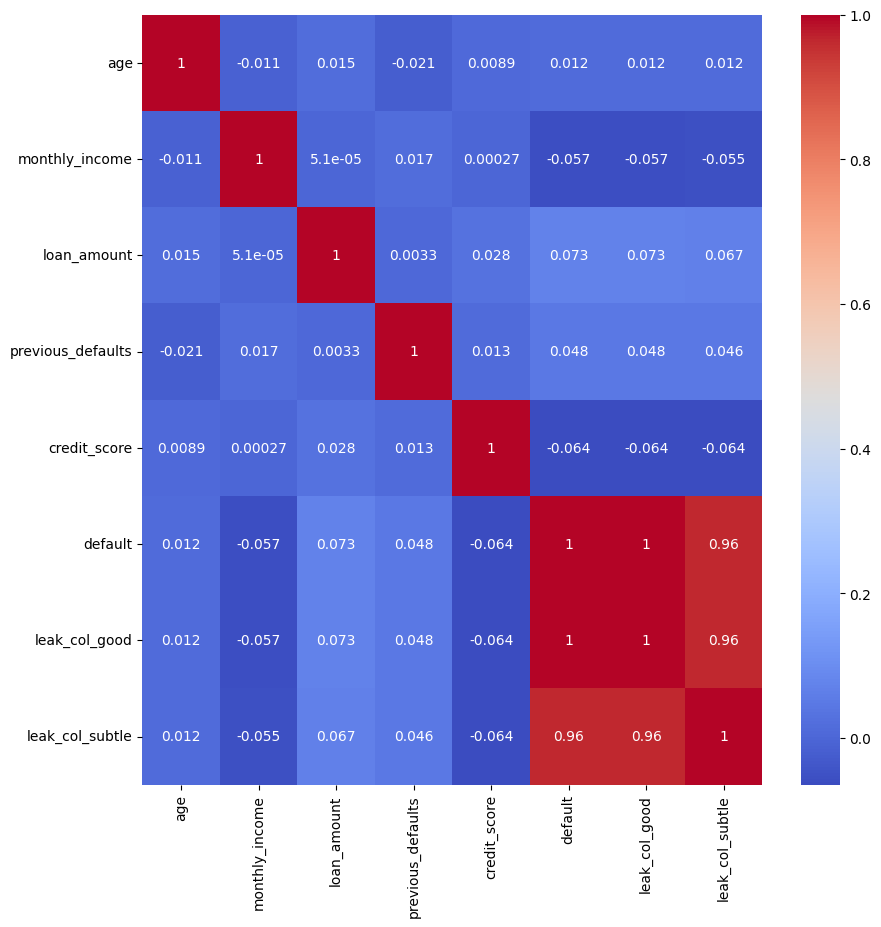

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(col.corr(), annot=True, cmap='coolwarm')
plt.show()

Melalui plot di atas, diketahui bahwa variabel prediktor "leak_col_good" dan "leak_col_subtle" memiliki korelasi yang sangat kuat dengan variabel respon "default". Kedua variabel prediktor ini harus dihapus dari data sebelum melakukan pemodelan, karena memberi informasi bocoran dari masa depan, yang tidak tersedia saat prediksi nyata dilakukan.

Sementara itu, melalui plot di atas tidak terlihat adanya korelasi antara variabel prediktor. Hal ini menunjukkan bahwa tidak ada masalah Multikolinearitas. Masing-masing variabel harus bebas linear dan tidak boleh berkorelasi antar sesama, karena dapat mempengaruhi hasil analisis.

## **Distributions**

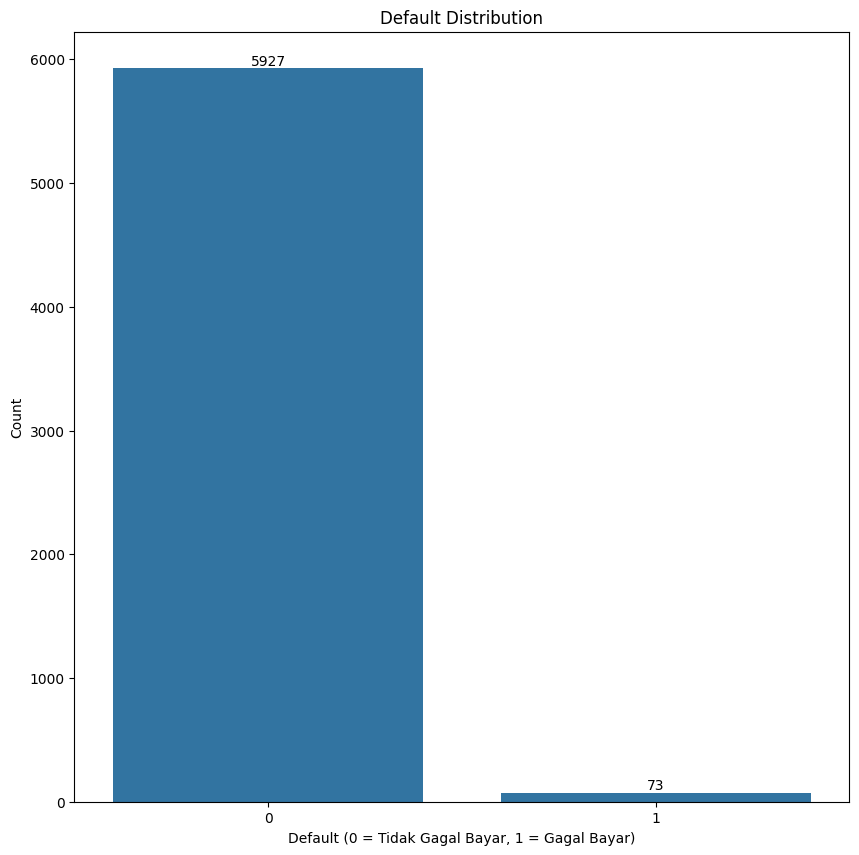

In [ ]:
# Bar chart
plt.figure(figsize=(10,10))
sns.countplot(x='default', data=data)

# Show value
for i, v in enumerate(data['default'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.title('Default Distribution')
plt.xlabel('Default (0 = Tidak Gagal Bayar, 1 = Gagal Bayar)')
plt.ylabel('Count')
plt.show()

Melalui plot di atas, diketahui bahwa terjadi ketidakseimbangan antar kelas, kelas 0 dan kelas 1. Satu label kelas memiliki jumlah observasi yang sangat tinggi sebanyak 5927, dan label kelas lainnya memiliki jumlah observasi yang sangat sedikit sebanyak 73.

Harus dilakukan penanganan menggunakan teknik yang tepat untuk mengatasi permasalahan ini, sehingga mampu menjawab tantangan data.

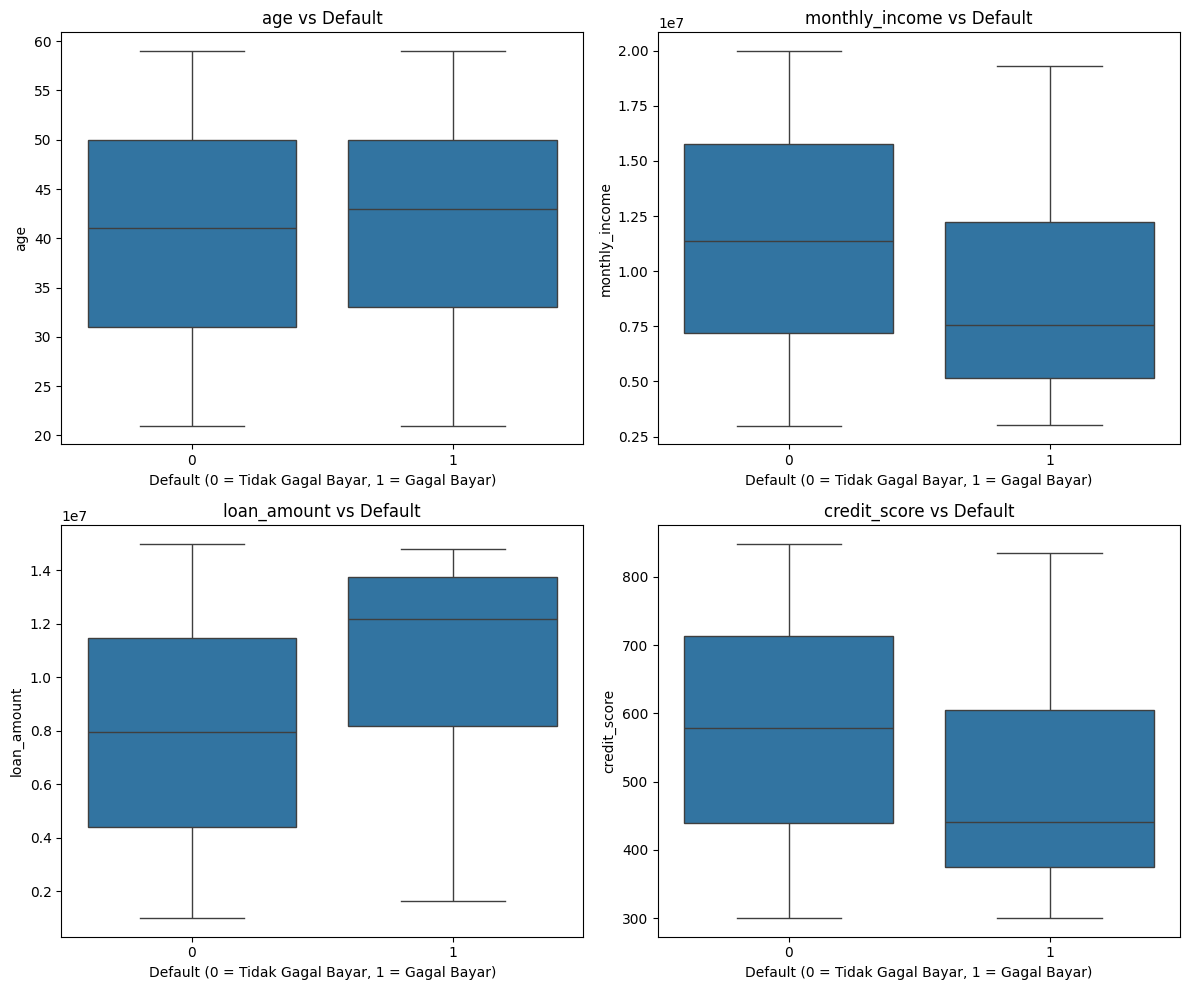

In [ ]:
# Define the numerical columns
numerical_columns_for_boxplot = ['age', 'monthly_income', 'loan_amount', 'credit_score']

# Box-Plot
plt.figure(figsize=(12, 10))
for i, column_name in enumerate(numerical_columns_for_boxplot):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='default', y=column_name, data=data)
    plt.title(f'{column_name} vs Default')
    plt.xlabel("Default (0 = Tidak Gagal Bayar, 1 = Gagal Bayar)")
    plt.ylabel(column_name)
plt.tight_layout()
plt.show()

Berdasarkan plot di atas, diketahui bahwa:
- Rata-rata usia nasabah yang "Gagal Bayar" dan nasabah yang "Tidak Gagal Bayar" berkisar di usia 40 tahunan. Perbedaan selisih usia antar nasabah tersebut sangatlah kecil, sehingga perlu dilakukan analisis lanjutan untuk mengetahui apakah usia sebagai faktor yang mempengaruhi kemampuan seseorang untuk membayar pinjaman.
- Rata-rata pendapatan bulanan nasabah yang mampu membayar pinjaman "Tidak Gagal Bayar", cenderung lebih tinggi dibandingkan pendapatan bulanan nasabah yang tidak mampu membayar pinjaman "Gagal Bayar". Hal ini berarti, semakin besar pendapatan bulanan yang diterima maka nasabah tersebut semakin mampu membayar pinjaman.
- Rata-rata besaran pinjaman pada nasabah yang tidak mampu membayar pinjamanannya "Gagal Bayar", cenderung lebih tinggi dibandingkan dengan besaran pinjaman pada nasabah yang mampu membayar pinjamannya "Tidak Gagal Bayar".
Semakin sedikit pendapatan yang diterima setiap bulannya, semakin sulit bagi nasabah tersebut untuk membayar besarnya pinjaman yang telah dipinjamkan.
- Rata-rata skor kredit nasabah yang mampu membayar pinjaman "Tidak Gagal Bayar", memiliki nilai yang tinggi dibandingkan nasabah yang tidak mampu membayar pinjaman "Gagal Bayar". Semakin tinggi skor kredit berarti nasabah tersebut lebih rendah risiko "Gagal Bayar".

Meskipun demikian, perlu dilakukan analisis yang mendalam untuk mengetahui faktor-faktor apa saja yang paling dominan dalam kemampuan membayar pinjaman,

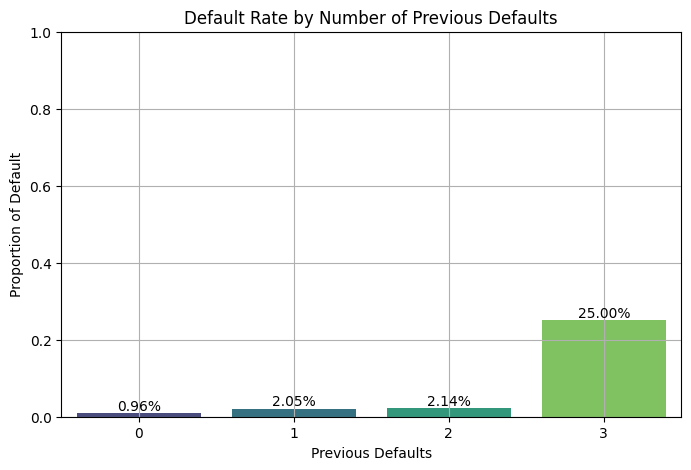

In [ ]:
# Calculate default mean for default previous
grouped = data.groupby('previous_defaults')['default'].mean().reset_index()

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(x='previous_defaults', y='default', data=grouped, palette='viridis')
# show value
for i, v in enumerate(grouped['default']):
    plt.text(i, v, f'{v*100:.2f}%', ha='center', va='bottom')
plt.title('Default Rate by Number of Previous Defaults')
plt.xlabel('Previous Defaults')
plt.ylabel('Proportion of Default')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Berdasarkan output di atas diketahui bahwa:
- Proporsi kejadian nasabah yang hampir tidak pernah gagal dalam membayar pinjaman, sebesar 0,96%.
- Proporsi kejadian nasabah yang 1 kali gagal dalam membayar pinjaman, sebesar 2,05%.
- Proporsi kejadian nasabah yang 2 kali gagal dalam membayar pinjaman, sebesar 2,14%.
- Proporsi kejadian nasabah yang 3 kali gagal dalam membayar pinjaman, sebesar 25%.

Hal ini menunjukkan bahwa terjadi lonjakan tajam pada nasabah yang gagal membayar pinjamanannya sebanyak 3 kali, sehingga kemungkinan nasabah tersebut gagal bayar pinjamannya kembali mencapai 25%.

# **DATA PREPROCESSING**

Tahapan selanjunya yang perlu dilakukan adalah proses mempersiapkan data mentah agar siap untuk analisis lebih lanjut. Tujuannya agar data menjadi lebih berkualitas, konsisten, dan dapat diandalkan.  

## **Drop Column**

In [ ]:
data = data.drop(columns=['leak_col_good', 'leak_col_subtle'])
data

,application_id,age,monthly_income,loan_amount,previous_defaults,credit_score,default
0,501000,41,13995609,5982664,0,624,0
1,501001,58,13683833,3711198,0,809,0
2,501002,33,9417391,7172332,0,647,0
3,501003,45,6861811,8661056,0,450,0
4,501004,22,5640742,4520669,1,816,0
...,...,...,...,...,...,...,...
5995,506995,26,18253018,3690565,2,729,0
5996,506996,40,9944385,4082038,1,477,0
5997,506997,28,9048532,14760384,0,450,0
5998,506998,51,6843160,11774594,0,561,0


Penghapusan kolom 'leak_col_good', 'leak_col_subtle' sebagai data leakage

## **Split Data**

In [ ]:
X = data.drop(columns=['application_id', 'default'])
y = data['default']

Melakukan pemisahan data ke dalam variabel respon dan variabel prediktor.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (4800, 5)
X_test : (1200, 5)
y_train : (4800,)
y_test : (1200,)


Berdasarkan output di atas, diketahui bahwa:
- Variabel X yang digunakan sebagai data latih terdiri dari 4800 baris dan 5 kolom
- Variabel X yang digunakan sebagai data uji terdiri dari 1200 baris dan 5 kolom
- Variabel y yang digunakan sebagai data latih terdiri dari 4800 kolom
- Variabel y yang digunakan sebagai data uji terdiri dari 1200 kolom

Partisi data dilakukan dengan membangi data menjadi 2 bagian, dengan proporsi 80% untuk data latih dan 20% untuk data uji (sesuai dengan hukum pareto).

In [ ]:
X_train

,age,monthly_income,loan_amount,previous_defaults,credit_score
382,49,15929405,7257297,0,537
2603,50,13636274,6963137,0,610
65,48,3094579,1847424,0,356
3332,22,6156666,9324793,0,406
833,47,9886549,9609103,0,347
...,...,...,...,...,...
1971,54,14085892,13618694,0,656
4962,43,19475371,8319805,0,734
3005,31,4652582,3723409,1,632
591,29,12899797,4386421,0,816


In [ ]:
X_test

,age,monthly_income,loan_amount,previous_defaults,credit_score
730,24,5410762,2006571,0,522
4541,54,8778441,14120345,0,653
4065,28,14890214,2779923,0,804
1030,50,7157863,2182941,0,425
2346,37,5810685,7980815,0,737
...,...,...,...,...,...
516,51,13984242,8223082,1,792
3335,39,19009353,8497236,0,634
965,57,3282043,3011847,1,617
5468,34,12881082,7750416,0,353


In [ ]:
y_train

,default
382,0
2603,0
65,0
3332,0
833,0
...,...
1971,0
4962,0
3005,0
591,0


In [ ]:
y_test

,default
730,0
4541,0
4065,0
1030,0
2346,0
...,...
516,0
3335,0
965,0
5468,0


## **Standardization**

In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

Melakukan standarisasi terhadap variabel prediktor yang bertipe data numerik. Proses ini dilakukan agar keseluruhan variabel memiliki skala yang sama.

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

In [ ]:
X_train_scaled

,age,monthly_income,loan_amount,previous_defaults,credit_score
382,0.765304,0.914834,-0.185046,-0.501123,-0.249220
2603,0.853560,0.447973,-0.257370,-0.501123,0.211396
65,0.677048,-1.698224,-1.515143,-0.501123,-1.391295
3332,-1.617595,-1.074810,0.323278,-0.501123,-1.075804
833,0.588793,-0.315438,0.393180,-0.501123,-1.448083
...,...,...,...,...,...
1971,1.206582,0.539511,1.378997,-0.501123,0.501646
4962,0.235771,1.636762,0.076187,-0.501123,0.993811
3005,-0.823295,-1.381028,-1.053905,1.546018,0.350211
591,-0.999806,0.298033,-0.890893,-0.501123,1.511215


In [ ]:
X_test_scaled

,age,monthly_income,loan_amount,previous_defaults,credit_score
730,-1.441084,-1.226669,-1.476015,-0.501123,-0.343867
4541,1.206582,-0.541039,1.502336,-0.501123,0.482717
4065,-1.088062,0.703264,-1.285875,-0.501123,1.435497
1030,0.853560,-0.870975,-1.432651,-0.501123,-0.955918
2346,-0.293762,-1.145248,-0.007159,-0.501123,1.012741
...,...,...,...,...,...
516,0.941815,0.518816,0.052406,1.546018,1.359780
3335,-0.117251,1.541885,0.119811,-0.501123,0.362831
965,1.471348,-1.660058,-1.228853,1.546018,0.255564
5468,-0.558529,0.294223,-0.063806,-0.501123,-1.410224


## **SMOTE (Synthetic Minority Oversampling Technique)**

Salah satu teknik yang dapat mengatasi permasalah data yang tidak seimbang (Imbalanced Data) adalah teknik SMOTE. Teknik ini bekerja dengan cara membuat sampel data baru (data sintetis) dari kelas minoritas, sehingga jumlah data pada semua kelas menjadi lebih seimbang.

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
X_train_resampled

,age,monthly_income,loan_amount,previous_defaults,credit_score
0,0.765304,0.914834,-0.185046,-0.501123,-0.249220
1,0.853560,0.447973,-0.257370,-0.501123,0.211396
2,0.677048,-1.698224,-1.515143,-0.501123,-1.391295
3,-1.617595,-1.074810,0.323278,-0.501123,-1.075804
4,0.588793,-0.315438,0.393180,-0.501123,-1.448083
...,...,...,...,...,...
9479,-0.043284,-1.273802,1.168667,-0.501123,-0.861271
9480,1.206582,-1.557961,1.265069,-0.501123,-0.963361
9481,-0.562495,-1.592172,0.424767,1.546018,-0.171073
9482,0.369927,-0.662782,1.107673,1.546018,0.325310


In [ ]:
y_train_resampled

,default
0,0
1,0
2,0
3,0
4,0
...,...
9479,1
9480,1
9481,1
9482,1


In [ ]:
y_train.value_counts()

,count
default,
0,4742
1,58


In [ ]:
y_train_resampled.value_counts()

,count
default,
0,4742
1,4742


Setelah dilakukan teknik SMOTE, jumlah data menjadi seimbang.

# **MODELLING**

Pemodelan menggunakan algoritma Binary Logistic Regression dan Gradient Boosting untuk memprediksi risiko nasabah yang gagal membayar pinjamannya.

## **Binary Logistic Regression**

In [ ]:
# Define pipeline
lr_pipeline = Pipeline([
    ('classifier', LogisticRegression(random_state=42))
])

# Define params
lr_param = {
    'classifier__penalty': ['l2'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__solver': ['lbfgs', 'newton-cg', 'newton-cholesky']
}

# Hyperparameter tuning
grid_search_lr = GridSearchCV(lr_pipeline, lr_param, cv=5, scoring='roc_auc')
grid_search_lr.fit(X_train_resampled, y_train_resampled)
print("Best parameters: ", grid_search_lr.best_params_)
print("Best score: ", grid_search_lr.best_score_*100)

# Best model
best_lr_model = grid_search_lr.best_estimator_

# ROC AUC score
print("ROC AUC score: ", roc_auc_score(y_test, best_lr_model.predict_proba(X_test_scaled)[:, 1])*100)

Best parameters:  {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cholesky'}
Best score:  83.43423352951046
ROC AUC score:  75.21237693389592


Berdasarkan output di atas, diketahui bahwa kombinasi parameter eksternal yang diperoleh selama pelatihan berlangsung, menghasilkan skor terbaik sebesar 83,43%. Artinya kombinasi parameter ini sesuai dalam membantu model untuk meningkatkan kinerjanya.

Sementara itu, selama pelatihan berlangsung model dievaluasi menggunakan kombinasi parameter yang diperoleh dan didapatkan metrik ROC AUC Score sebesar 75,21%. Artinya kemapuan model dalam membedakan antara default dan non-default cukup baik.

## **Gradient Boosting Classifier**

In [ ]:
# Define pipeline
gb_pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Define params
gb_param = {
    'classifier__n_estimators': [100],
    'classifier__learning_rate': [0.01, 0.1, 1],
    'classifier__max_depth': [3, 5, 7]
}

# Hyperparameter tuning
grid_search_gb = GridSearchCV(gb_pipeline, gb_param, cv=5, scoring='roc_auc')
grid_search_gb.fit(X_train_resampled, y_train_resampled)
print("Best parameters: ", grid_search_gb.best_params_)
print("Best score: ", grid_search_gb.best_score_*100)

# Best model
best_gb_model = grid_search_gb.best_estimator_

# ROC AUC score
print("ROC AUC score: ", roc_auc_score(y_test, best_gb_model.predict_proba(X_test_scaled)[:, 1])*100)

Best parameters:  {'classifier__learning_rate': 1, 'classifier__max_depth': 7, 'classifier__n_estimators': 100}
Best score:  99.88256239670058
ROC AUC score:  47.184247538677916


Berdasarkan output di atas, diketahui bahwa kombinasi parameter eksternal yang diperoleh selama pelatihan berlangsung, menghasilkan skor terbaik sebesar 99,88%. Skor yang terlalu tinggi dan tidak realistis ini menandakan bahwa model mengalami overfitting.

Sementara itu, selama pelatihan berlangsung model dievaluasi menggunakan kombinasi parameter yang diperoleh dan didapatkan metrik ROC AUC Score sebesar 47,18%. Artinya model sulit dalam membedakan antara default dan non-default.

# **MODEL EVALUATION**

Pemilihan model terbaik dilakukan menggunakan beberapa metrik untuk menentukan model terbaik yang digunakan untuk prediksi credit scoring.

## **Binary Logistic Regression**

In [ ]:
y_pred_probs_lr = best_lr_model.predict_proba(X_test_scaled)[:, 1]
y_pred_probs_lr

array([0.21198994, 0.54707343, 0.01720436, ..., 0.34177055, 0.48898527,
       0.84723871])

Output di atas adalah peluang setiap nasabah untuk masuk ke kategori tertentu. Semakin mendekati 1, maka nasabah tersebut lebih cocok masuk ke kategori tersebut. Sebaliknya, jika semakin mendekati 0 maka nasabah tersebut mustahil masuk ke kategori tersebut.

In [ ]:
best_threshold = 0
best_f1 = 0

for t in np.arange(0.1, 0.9, 0.01):
    y_pred_thresh_lr = (y_pred_probs_lr >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh_lr)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best Threshold Binary Logistic Regression = {best_threshold:.2f}, F1 Score = {best_f1:.4f}")

Best Threshold Binary Logistic Regression = 0.85, F1 Score = 0.1509


Output di atas dilakukan untuk menemukan ambang batas yang sesuai dalam melakukan prediksi.

In [ ]:
y_pred_lr_adj = (y_pred_probs_lr >= best_threshold).astype(int)
y_pred_lr_adj

array([0, 0, 0, ..., 0, 0, 0])

Output di atas adalah hasil prediksi dari model yang terbentuk.

In [ ]:
print(f'Accuracy:  {accuracy_score(y_test, y_pred_lr_adj)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_pred_lr_adj)*100:.2f}%')
print(f'Recall:    {recall_score(y_test, y_pred_lr_adj)*100:.2f}%')
print(f'F1 Score:  {f1_score(y_test, y_pred_lr_adj)*100:.2f}%')

Accuracy:  96.25%
Precision: 10.53%
Recall:    26.67%
F1 Score:  15.09%


Berdasarkan output evaluasi:

- Dari 1200 data yang diprediksi, model mampu memprediksi 1155 data dengan benar, sehingga akurasi model adalah 96,25%. Ini berarti hanya 45 prediksi yang tidak sesuai dengan label yang sebenarnya.
- Presisi model sebesar 10,53% menunjukkan bahwa dari semua prediksi yang dibuat untuk setiap kelas, hanya 10,53%% yang sesuai dengan kelas aslinya, sedangkan 89,47% tidak sesuai dengan kelas aslinya. Ini berarti bahwa model tersebut sering memberikan label yang salah (False Positive).
- Recall model sebesar 26,67% menunjukkan bahwa dari semua data yang sebenarnya termasuk dalam setiap kelas, model hanya dapat mengidentifikasi dengan benar sekitar 26,67%, sedangkan 73,33% tidak dapat diidentifikasi. Ini berarti bahwa model sering melewatkan data yang seharusnya diidentifikasi (False Negative).
- Dengan nilai F1 sebesar 15,09%, menunjukkan bahwa presisi dan recall tidak seimbang seimbang. Nilai rendah ini menunjukkan bahwa model kesulitan menyeimbangkan antara menghindari label yang salah dan mendeteksi default dengan akurat.

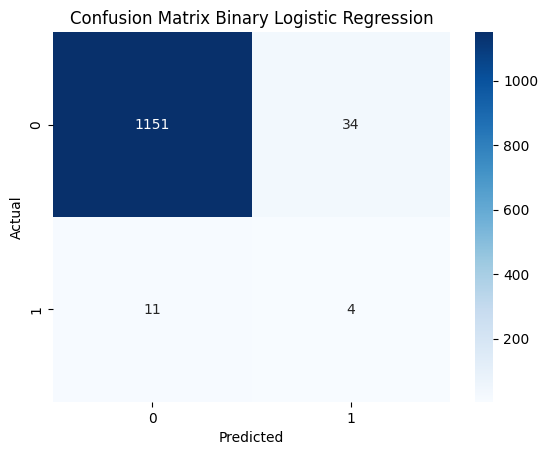

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr_adj)
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Binary Logistic Regression')
plt.show()

Berdasarkan plot konfusi matriks di atas:

- Untuk kelas 0, model berhasil mengklasifikasikan 1151 dari 1185 data dengan benar dan hanya 34 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 1. Selain itu, 11 data dari kelas 1 juga salah diprediksi sebagai kelas 0.
- Untuk kelas 1, model berhasil mengklasifikasikan hanya 4 dari 15 data dengan benar dan 11 data salah diklasifikasikan ke kelas lain, yaitu kelas 0. Selain itu, 34 data data dari kelas 0 juga salah diprediksi sebagai kelas 1.

Model terlalu condong ke kelas mayoritas (kelas 0)

In [ ]:
cr_lr = classification_report(y_test, y_pred_lr_adj)
print("Classification Report Binary Logistic Regression:\n", cr_lr)

Classification Report Binary Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1185
           1       0.11      0.27      0.15        15

    accuracy                           0.96      1200
   macro avg       0.55      0.62      0.57      1200
weighted avg       0.98      0.96      0.97      1200



In [ ]:
lr_roc_auc = roc_auc_score(y_test, y_pred_probs_lr)
print(f'ROC AUC Score: {lr_roc_auc*100:.2f}%')

ROC AUC Score: 75.21%


Model memiliki kemampuan yang baik dalam membedakan antar kelas. Dengan AUC sebesar 75,21%, kemungkinan besar prediksi model dapat membedakan data antar kategori dengan tingkat akurasi yang sangat tinggi.

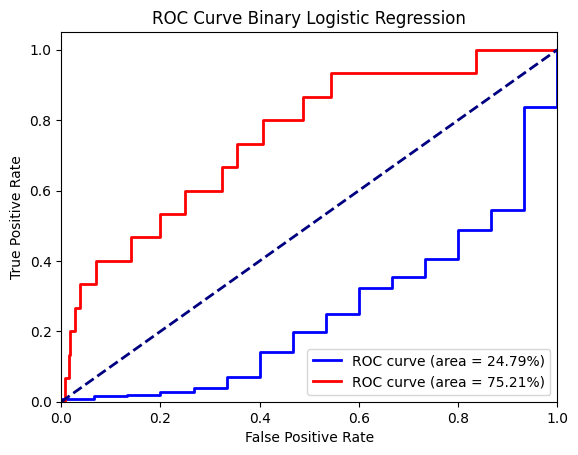

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs_lr, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot roc
plt.figure()
colors = ['blue', 'red']
for i in range(2):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve (area = {roc_auc[i]*100:.2f}%)')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Binary Logistic Regression')
plt.legend(loc="lower right")
plt.show()

ROC AUC 75.21% (kurva merah) adalah metrik utama dan menunjukkan model sudah cukup baik dalam mengidentifikasi risiko kredit. Model mampu membedakan dengan baik antara "Gagal Bayar" (1) dan "Tidak Gagal Bayar" (0).

## **Gradient Boosting Classifier**

In [ ]:
y_pred_probs_gb = best_gb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_probs_gb

array([3.28395003e-09, 2.56891877e-06, 2.83471385e-09, ...,
       1.77145664e-11, 9.99844932e-01, 1.19538919e-04])

Output di atas adalah peluang setiap nasabah untuk masuk ke kategori tertentu. Semakin mendekati 1, maka nasabah tersebut lebih cocok masuk ke kategori tersebut. Sebaliknya, jika semakin mendekati 0 maka nasabah tersebut mustahil masuk ke kategori tersebut.

In [ ]:
best_threshold = 0
best_f1 = 0

for t in np.arange(0.1, 0.9, 0.01):
    y_pred_thresh_gb = (y_pred_probs_gb >= t).astype(int)
    f1 = f1_score(y_test, y_pred_thresh_gb)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best Threshold (GB) = {best_threshold:.2f}, F1 Score = {best_f1:.4f}")

Best Threshold (GB) = 0.19, F1 Score = 0.0455


Output di atas dilakukan untuk menemukan ambang batas yang sesuai dalam melakukan prediksi.

In [ ]:
y_pred_gb_adj = (y_pred_probs_gb >= best_threshold).astype(int)
y_pred_gb_adj

array([0, 0, 0, ..., 0, 1, 0])

Output di atas adalah hasil prediksi dari model yang terbentuk.

In [ ]:
print(f'Accuracy:  {accuracy_score(y_test, y_pred_gb_adj)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_pred_gb_adj)*100:.2f}%')
print(f'Recall:    {recall_score(y_test, y_pred_gb_adj)*100:.2f}%')
print(f'F1 Score:  {f1_score(y_test, y_pred_gb_adj)*100:.2f}%')

Accuracy:  96.50%
Precision: 3.45%
Recall:    6.67%
F1 Score:  4.55%


Berdasarkan output evaluasi:

- Dari 1200 data yang diprediksi, model mampu memprediksi 1158 data dengan benar, sehingga akurasi model adalah 96,5%. Ini berarti hanya 42 prediksi yang tidak sesuai dengan label yang sebenarnya.
- Presisi model sebesar 3,45% menunjukkan bahwa dari semua prediksi yang dibuat untuk setiap kelas, hanya 3,45%% yang sesuai dengan kelas aslinya, sedangkan 96,55% tidak sesuai dengan kelas aslinya. Ini berarti bahwa model tersebut sering memberikan label yang salah (False Positive).
- Recall model sebesar 6,67% menunjukkan bahwa dari semua data yang sebenarnya termasuk dalam setiap kelas, model hanya dapat mengidentifikasi dengan benar sekitar 6,67%, sedangkan 93,33% tidak dapat diidentifikasi. Ini berarti bahwa model sering melewatkan data yang seharusnya diidentifikasi (False Negative).
- Dengan nilai F1 sebesar 4,55%, menunjukkan bahwa presisi dan recall tidak seimbang seimbang. Nilai rendah ini menunjukkan bahwa model kesulitan menyeimbangkan antara menghindari label yang salah dan mendeteksi default dengan akurat.

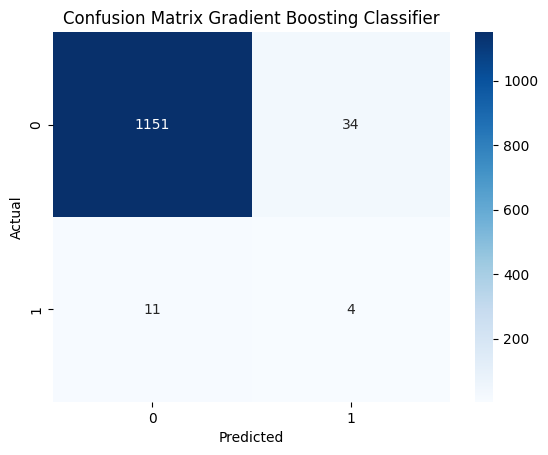

In [ ]:
cm_gb = confusion_matrix(y_test, y_pred_gb_adj)
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Gradient Boosting Classifier')
plt.show()

Berdasarkan plot konfusi matriks di atas:

- Untuk kelas 0, model berhasil mengklasifikasikan 1151 dari 1185 data dengan benar dan hanya 34 data yang salah diklasifikasikan ke kelas lain, yaitu kelas 1. Selain itu, 11 data dari kelas 1 juga salah diprediksi sebagai kelas 0.
- Untuk kelas 1, model berhasil mengklasifikasikan hanya 4 dari 15 data dengan benar dan 11 data salah diklasifikasikan ke kelas lain, yaitu kelas 0. Selain itu, 34 data data dari kelas 0 juga salah diprediksi sebagai kelas 1.
Model terlalu condong ke kelas mayoritas (kelas 0)

In [ ]:
cr_gb = classification_report(y_test, y_pred_gb_adj)
print("Classification Report Gradient Boosting Classifier:\n", cr_lr)

Classification Report Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1185
           1       0.11      0.27      0.15        15

    accuracy                           0.96      1200
   macro avg       0.55      0.62      0.57      1200
weighted avg       0.98      0.96      0.97      1200



In [ ]:
gb_roc_auc = roc_auc_score(y_test, y_pred_probs_gb)
print(f'ROC AUC Score: {gb_roc_auc*100:.2f}%')

ROC AUC Score: 47.18%


Model memiliki kemampuan yang buruk dalam membedakan antar kelas. Dengan AUC sebesar 47,18%, kemungkinan besar prediksi model kesulitan membedakan data antar kategori.

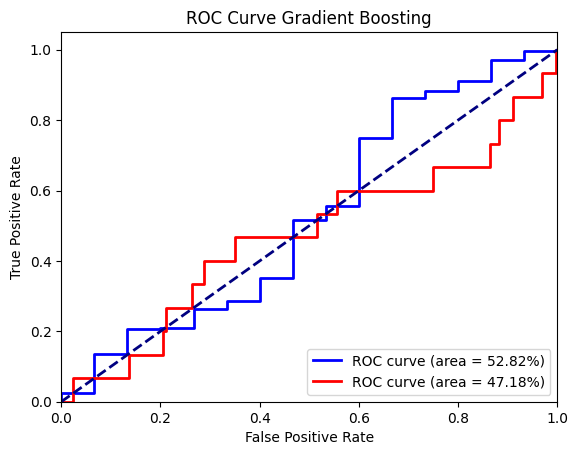

In [ ]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_probs_gb, pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# plot roc
plt.figure()
colors = ['blue', 'red']
for i in range(2):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve (area = {roc_auc[i]*100:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

ROC AUC 47,18% (kurva merah) adalah metrik utama dan menunjukkan model kurang baik dalam mengidentifikasi risiko kredit. Model kesulitan membedakan dengan baik antara "Gagal Bayar" (1) dan "Tidak Gagal Bayar" (0).

## **Table Comparison**

In [ ]:
score_comparison = pd.DataFrame({
    'Model': ['Binary Logistic Regression', 'Gradient Boosting Classifier'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr_adj)*100, accuracy_score(y_test, y_pred_gb_adj)*100],
    'Precision': [precision_score(y_test, y_pred_lr_adj)*100, precision_score(y_test, y_pred_gb_adj)*100],
    'Recall': [recall_score(y_test, y_pred_lr_adj)*100, recall_score(y_test, y_pred_gb_adj)*100],
    'F1 Score': [f1_score(y_test, y_pred_lr_adj)*100, f1_score(y_test, y_pred_gb_adj)*100],
    'ROC AUC Score': [roc_auc_score(y_test, y_pred_probs_lr)*100, roc_auc_score(y_test, y_pred_probs_gb)*100]
})
score_comparison

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
0,Binary Logistic Regression,96.25,10.526316,26.666667,15.094340,75.212377
1,Gradient Boosting Classifier,96.50,3.448276,6.666667,4.545455,47.184248


Berdasarkan output di atas, diketahui bahwa:
- ROC AUC digunakan sebagai metrik utama dalam credit scoring karena mencerminkan kemampuan model membedakan risiko nasabah tanpa bergantung pada ambang batas (threshold) tertentu.
- Model Regresi Logistik Biner dipilih untuk karena memiliki ROC AUC ≥ 70%, sehingga dianggap layak karena mampu mengurutkan risiko kredit secara efektif.

# **PREDICTION**

In [ ]:
# Fitted Values
fitted_values = best_lr_model.predict(X_test_scaled)
fitted_values

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
actual_values = y_test
actual_values

,default
730,0
4541,0
4065,0
1030,0
2346,0
...,...
516,0
3335,0
965,0
5468,0


In [ ]:
# Save to csv
pd.DataFrame({'Actual': actual_values, 'Fitted': fitted_values}).to_csv('prediction.csv', index=False)

# **SCORECARD**

In [ ]:
y_pred_probs_lr

array([0.21198994, 0.54707343, 0.01720436, ..., 0.34177055, 0.48898527,
       0.84723871])

In [ ]:
# convert to score
def convert_to_score(y_pred_probs_lr, base_score = 300, score_range = 550):
    score = base_score + (1 - y_pred_probs_lr) * score_range
    return score

# Show credit score
credit_scores = convert_to_score(y_pred_probs_lr)
credit_scores

array([733.4055334 , 549.10961394, 840.5376032 , ..., 662.02620014,
       581.05810125, 384.01871162])

Output di atas, menunjukkan skor kredit dari hasil konversi peluang setiap nasabah dikategorikan ke dalam kelas tertentu, ke dalam skala 300 - 850 (sesuai referensi industri).

Semakin kecil skor kredit, maka semakin besar risiko nasabah Gagal Bayar, sebaliknya apabila semakin besar skor kredit maka semakin kecil risiko nasabah Gagal Bayar.

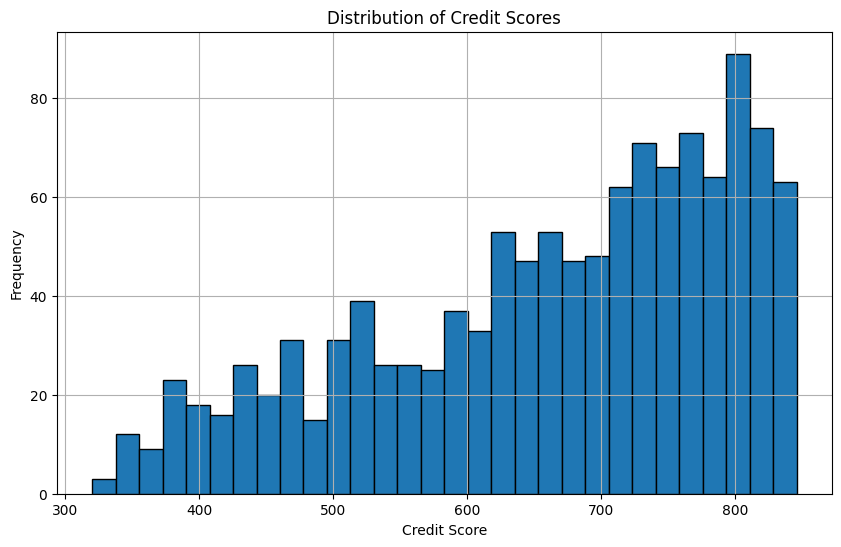

In [ ]:
# Histogram for credit scoring
plt.figure(figsize=(10, 6))
plt.hist(credit_scores, bins=30, edgecolor='k')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.grid(True)
plt.show()

Berdasarkan plot histogram di atas:
- Sebagian besar nasabah skor kredit disekitar 700 - 800. Artinya sebagian besar dari nasabah memiliki risiko Gagal Bayar yang rendah (Aman untuk diberi pinjaman).


# **SHAP TOP FEATURES**

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
# Initialize explainer
explainer = shap.Explainer(best_lr_model.predict_proba, X_train_scaled)

# Shap values
shap_values = explainer(X_test_scaled)

Nilai shap digunakan untuk membuat baseline expectation. Nilai ini akan menghitung berapa kontribusi masing-masing fitur terhadap probabilitas default untuk setiap nasabah

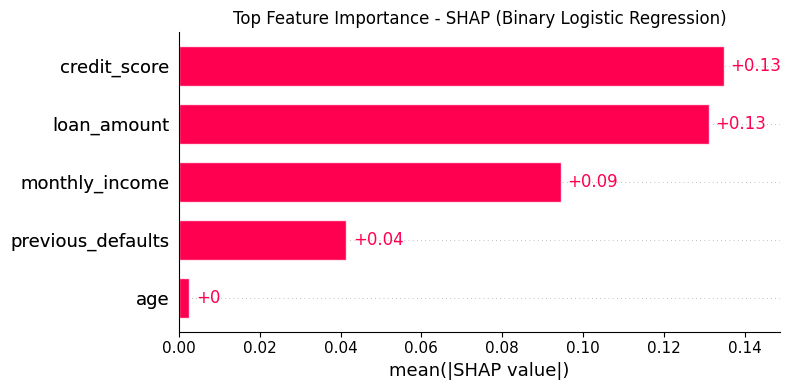

In [ ]:
# Plot for top features
plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values[:, :, 1], show=False)
plt.title("Top Feature Importance - SHAP (Binary Logistic Regression)")
plt.tight_layout()
plt.savefig("top_shap_lr.png", dpi=300)
plt.show()

Berdasarkan output di atas, diketahui bahwa:
- Urutan variabel yang paling berpengaruh terhadap keputusan nasabah untuk membayar pinjaman adalah credit score, loan amount, monthly income, dan previous defaults. Sementara itu, variabel age tidak berkontribusi signifikan terhadap keputusan.
- Model mengandalkan skor kredit dan jumlah pinjaman sebagai indikator utama untuk memprediksi risiko.

# **DECISION**

In [ ]:
# Set specific customer (i.e. 42)
applicant_idx = 42

# Probability for customer
proba_default = y_pred_probs_lr[applicant_idx]
print(f"Probability of Default: {proba_default:.2f}")

# Customer score
score = convert_to_score(np.array([proba_default]))[0]
print(f"Credit Score: {score:.2f}")

Probability of Default: 0.21
Credit Score: 733.81


Simulasi menggunakan sampel no 42

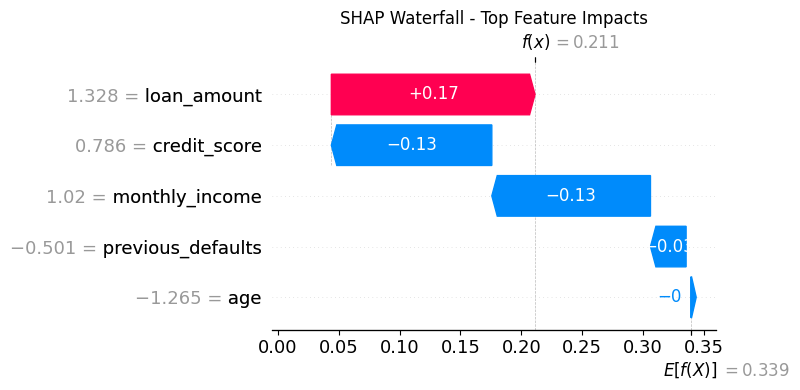

In [ ]:
# Extract shap values
shap_values_app = shap_values[applicant_idx, :, 1]

# Shap plot
shap.plots.waterfall(shap_values_app, max_display=10, show=False)
plt.title("SHAP Waterfall - Top Feature Impacts")
plt.tight_layout()
plt.savefig("shap_waterfall_applicant.png", dpi=300)
plt.show()

Berdasarkan output di atas, nasabah ke-42 yang digunakan sebagai sampel untuk memprediksi risiko Gagal Bayar atau Tidak Gagal Bayar.
- Faktor yang meningkatkan risiko membayar pinjaman adalah "loan_amount". Fitur ini menaikkan skor prediksi sebesar 0,17.
- Faktor yang menurunkan risiko membayar pinjaman adalah "credit score" dan "monthly income". Kedua fitur ini menurunkan skor prediksi sebesar 0,13.

- Nasabah ke-42 diprediksi memiliki risiko rendah untuk Gagal Bayar pinjaman.
- Jumlah pinjaman yang diajukan cukup besar, sehingga ini meningkatkan risiko gagal bayar.
- Namun, nasabah ini memiliki skor kredit yang tinggi dan penghasilan bulanan yang besar. Kedua hal ini membuat model menilai nasabah lebih mampu membayar pinjamannya tepat waktu.

In [ ]:
# Customer Data
credit_score = 786
loan_amount = 5000000
monthly_income = 10000000
previous_defaults = 0
age = 30

In [ ]:
# Model Results
predicted_risk = 0.211
baseline_risk = 0.339

In [ ]:
# Shap values for each features
shap_values = {
    'Loan Amount': +0.17,
    'Credit Score': -0.13,
    'Monthly Income': -0.13,
    'Previous Defaults': -0.01,
    'Age': 0.00
}

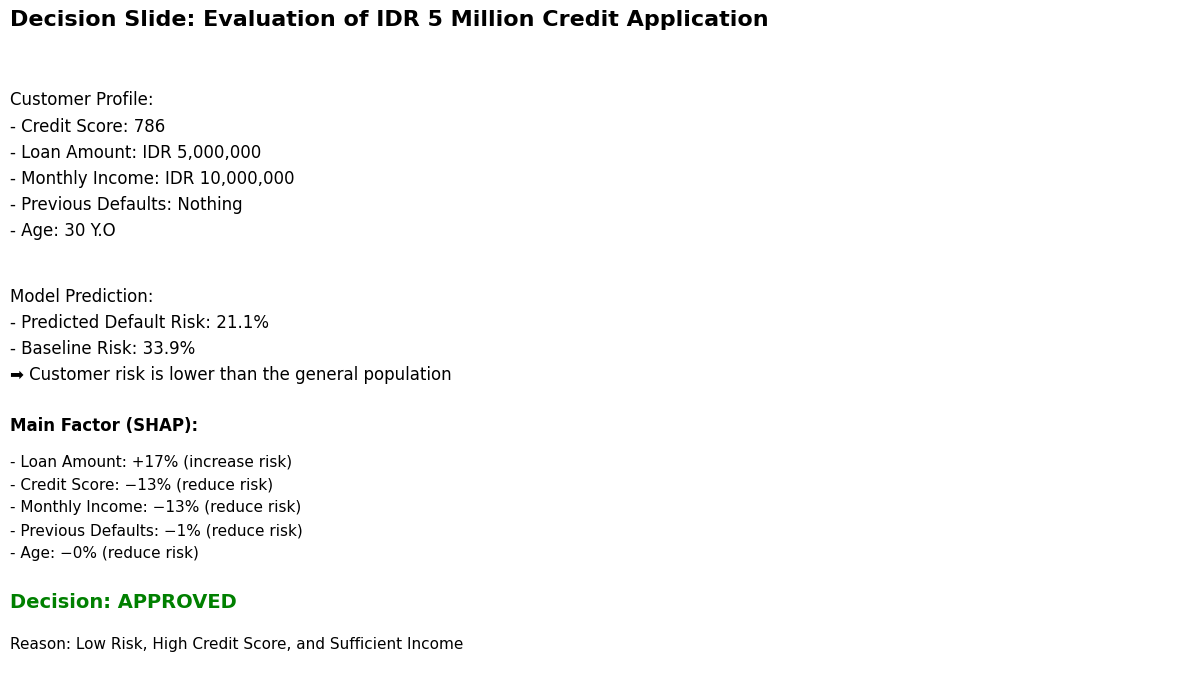

In [ ]:
# Slide Decision
fig, ax = plt.subplots(figsize=(12, 7))
plt.axis('off')

# Title
plt.text(0, 1.00, 'Decision Slide: Evaluation of IDR 5 Million Credit Application',
         fontsize=16, fontweight='bold')

# Section 1 - Customer Profile
profile_y = 0.90
profile_lines = [
    "Customer Profile:",
    f"- Credit Score: {credit_score}",
    f"- Loan Amount: IDR {loan_amount:,}",
    f"- Monthly Income: IDR {monthly_income:,}",
    "- Previous Defaults: Nothing",
    f"- Age: {age} Y.O"
]
for i, line in enumerate(profile_lines):
    plt.text(0, profile_y - i*0.04, line, fontsize=12, va='top')

# Section 2 - Model Prediction
analisis_y = profile_y - len(profile_lines)*0.04 - 0.06
analisis_lines = [
    "Model Prediction:",
    f"- Predicted Default Risk: {predicted_risk*100:.1f}%",
    f"- Baseline Risk: {baseline_risk*100:.1f}%",
    "➡️ Customer risk is lower than the general population"
]
for i, line in enumerate(analisis_lines):
    plt.text(0, analisis_y - i*0.04, line, fontsize=12, va='top')

# Section 3 - SHAP
shap_y = analisis_y - len(analisis_lines)*0.04 - 0.06
plt.text(0, shap_y, 'Main Factor (SHAP):', fontsize=12, fontweight='bold')
for i, (k, v) in enumerate(shap_values.items()):
    sign = "+" if v > 0 else "−"
    impact = '(increase risk)' if v > 0 else '(reduce risk)'
    line = f"- {k}: {sign}{abs(v)*100:.0f}% {impact}"
    plt.text(0, shap_y - (i+1)*0.035, line, fontsize=11, va='top')

# Section 4 - Decision
decision_y = shap_y - (len(shap_values)+1)*0.035 - 0.06
plt.text(0, decision_y, 'Decision: APPROVED',
         fontsize=14, fontweight='bold', color='green')
plt.text(0, decision_y - 0.045,
         'Reason: Low Risk, High Credit Score, and Sufficient Income',
         fontsize=11, va='top')

# Save the slide as an image
plt.savefig('decision_slide.png', dpi=300)

plt.tight_layout()
plt.show()